### AUTHOR: VAISHNAV KRISHNA P
#### INTERNSHIP: INTERN PE
#### Task
*  Make a Diabetes Prediction with ML
* After that make a separate Video on it and post On LinkedIn.And Tag Internpe

In [251]:
# Importing necessory libraries 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

# Ignoring uncompactable issues 
import warnings 
warnings.filterwarnings(action="ignore")

# scipy library skew and kurtosis
from scipy.stats import skew,kurtosis

# Scaling methods from the sklearn
from sklearn.preprocessing import MinMaxScaler,Normalizer,StandardScaler

# Importing necessory ML model for training 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# DataSet Splitting methods
from sklearn.model_selection import train_test_split,KFold,cross_val_score

# libraries for testing
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [252]:
# Loading the dataset 
df = pd.read_csv("diabetes-Internpe.csv")
data = df.copy()

In [253]:
# First five dataset 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:>

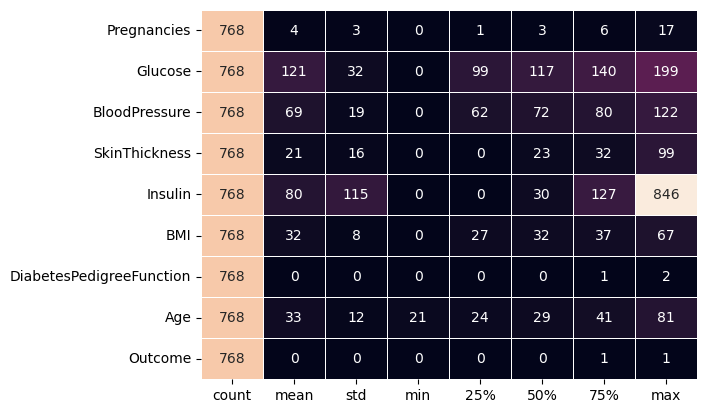

In [254]:
# Description about the dataset 
sns.heatmap(df.describe().transpose(),annot=True,fmt="0.0f",linewidth=0.6,cbar=False)

In [255]:
# Shape of the datset 
df.shape

(768, 9)

In [256]:
# Datatypes 
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### EDA 
1. MISSING VALUE ANALYSIS 
2. DIETRIBUTION ANALYSIS 
3. CORELATION ANALYSIS 
4. OUTLIER ANALYSIS 
5. GROUP BY ANALYSIS

#### MISSING VALUE ANALYSIS 

In [257]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

* So, the dataset is free from the Missing values 

#### DISTRUBUTION ANALYSIS

In [258]:
# Lets check the Number of categories in each feature 
for feature in df.columns:
    print("{}: No of unique values {}".format(feature,df[feature].nunique()))

Pregnancies: No of unique values 17
Glucose: No of unique values 136
BloodPressure: No of unique values 47
SkinThickness: No of unique values 51
Insulin: No of unique values 186
BMI: No of unique values 248
DiabetesPedigreeFunction: No of unique values 517
Age: No of unique values 52
Outcome: No of unique values 2


* Other tan Pregnancies all other features are contnous features

In [259]:
# Lets split the features in continous and categorical features
continous_features = []
categorical_features = []

for feature in df.columns:
    if df[feature].nunique()  <= 17:
        categorical_features.append(feature)
    else :
        continous_features.append(feature)

print("Continous features: ",continous_features)
print("Categorical features: ",categorical_features)
print("No of continous features: ",len(continous_features))
print("No of categorical features: ",len(categorical_features))

Continous features:  ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Categorical features:  ['Pregnancies', 'Outcome']
No of continous features:  7
No of categorical features:  2


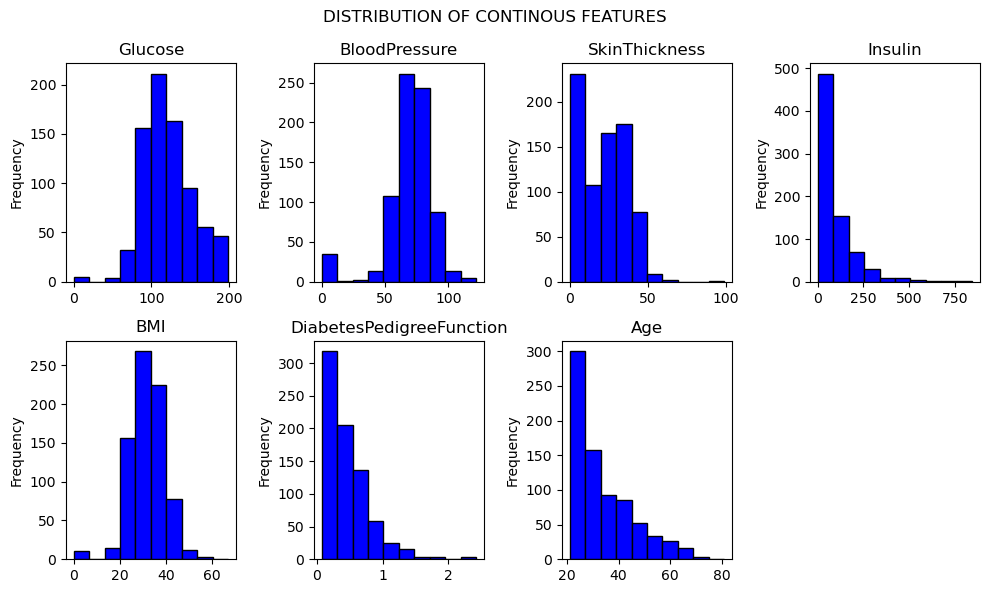

In [260]:
# Histogram for the analysis of the categorical features
plt.figure(figsize=(10,6))
plt.suptitle("DISTRIBUTION OF CONTINOUS FEATURES")
no_sub_plot = 1
for feature in continous_features:
    plt.subplot(2,4,no_sub_plot)
    no_sub_plot += 1
    df[feature].plot(kind="hist",color="b",edgecolor="k",title=f"{feature}")
plt.tight_layout()
plt.show()

In [261]:
# Lets check the skewness and Kurtosis values of each features
print("SKEWNESS AND KURTOSIS OF CONTINOUS FEATURES\n")
for feature in continous_features:
    print("{}: SKEWNESS -> {}  KURTOSIS -> {}".format(feature,skew(df[feature]),kurtosis(df[feature])))

SKEWNESS AND KURTOSIS OF CONTINOUS FEATURES

Glucose: SKEWNESS -> 0.17341395519987735  KURTOSIS -> 0.6288133337300685
BloodPressure: SKEWNESS -> -1.8400052311728738  KURTOSIS -> 5.138690662525438
SkinThickness: SKEWNESS -> 0.109158762323673  KURTOSIS -> -0.5244944887652805
Insulin: SKEWNESS -> 2.2678104585131753  KURTOSIS -> 7.159574916971424
BMI: SKEWNESS -> -0.42814327880861786  KURTOSIS -> 3.2612574203612645
DiabetesPedigreeFunction: SKEWNESS -> 1.9161592037386292  KURTOSIS -> 5.550792047551203
Age: SKEWNESS -> 1.127389259531697  KURTOSIS -> 0.6311769413798585


* So, from the above analysis we understood some of the features are positively skewed will apply some transformation techniques in the later on steps

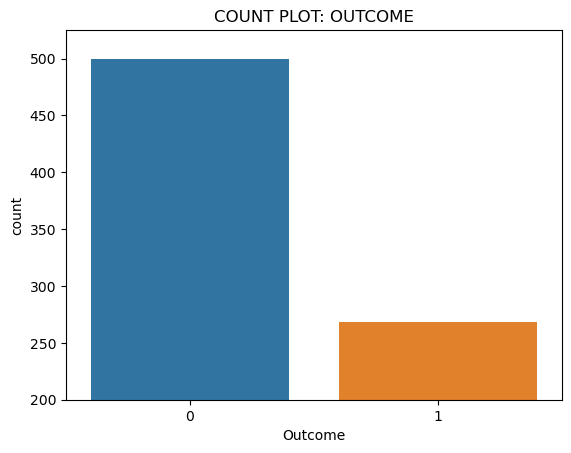

In [262]:
# Now lets understand wheather the dataset is balaced or not
plt.title("COUNT PLOT: OUTCOME")
sns.countplot(x="Outcome",data = df,saturation=0.75)
plt.ylim(200)
plt.show()

* DataSet is not balanced : Have to apply over sampling or under sambling

In [263]:
print("No of patients with daiabetics: ",df["Outcome"].value_counts().get(1))
print("No of patients without daiabetics: ",df["Outcome"].value_counts().get(0))

No of patients with daiabetics:  268
No of patients without daiabetics:  500


* Majority of the patients are not effected by Diabetics

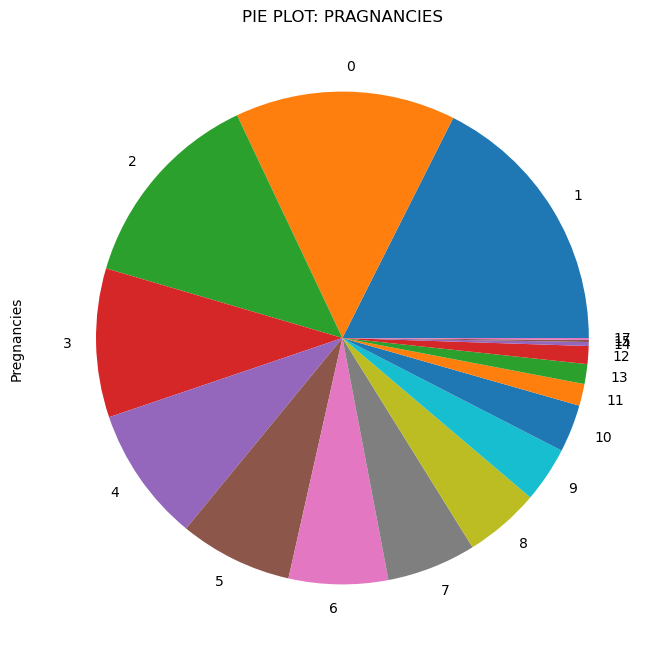

In [264]:
# Lets understand the data distribution of the Pregnancies
plt.figure(figsize=(8,8))
df["Pregnancies"].value_counts().plot(kind="pie",title="PIE PLOT: PRAGNANCIES")
plt.show()

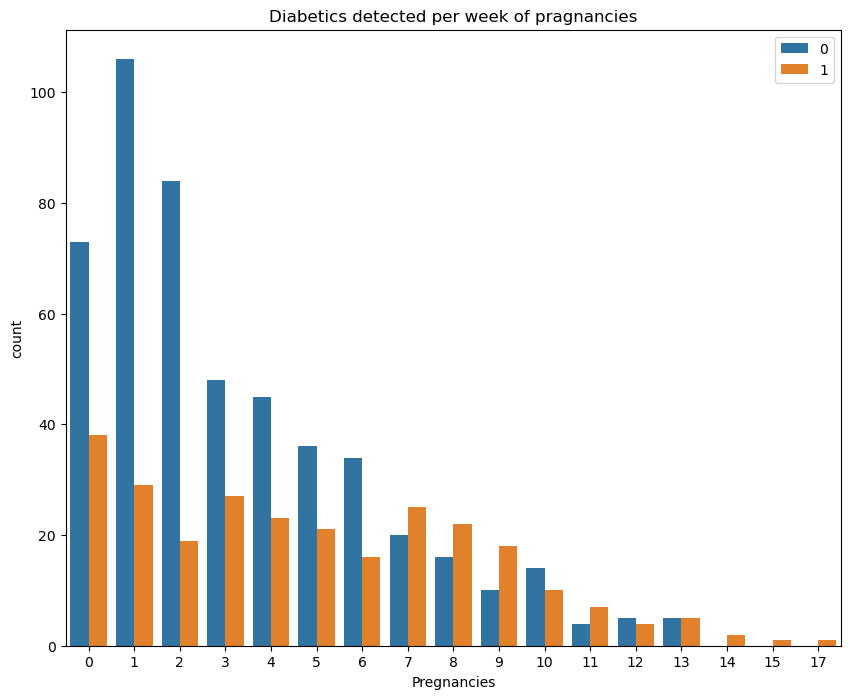

In [265]:
plt.figure(figsize=(10,8))
plt.title("Diabetics detected per week of pragnancies")
sns.countplot(x="Pregnancies",data = df,hue="Outcome")
plt.legend(loc="upper right")
plt.show()

* from the group bar chart it is understandable that the high value of the pregnancies higher the chance of getting diabetics

#### GROUP BY ANALYSIS

In [266]:
# Lets understand the apattern by group by analysis 
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


From the Group by analysis it is understandable that ,
* high Glucose level
* high skin thickness level
* high insulin level
* high BMI level
* High value of Diabetics preedigree function 
* high age  
are the symptoms for the diabetics

#### CORELATION ANALYSIS

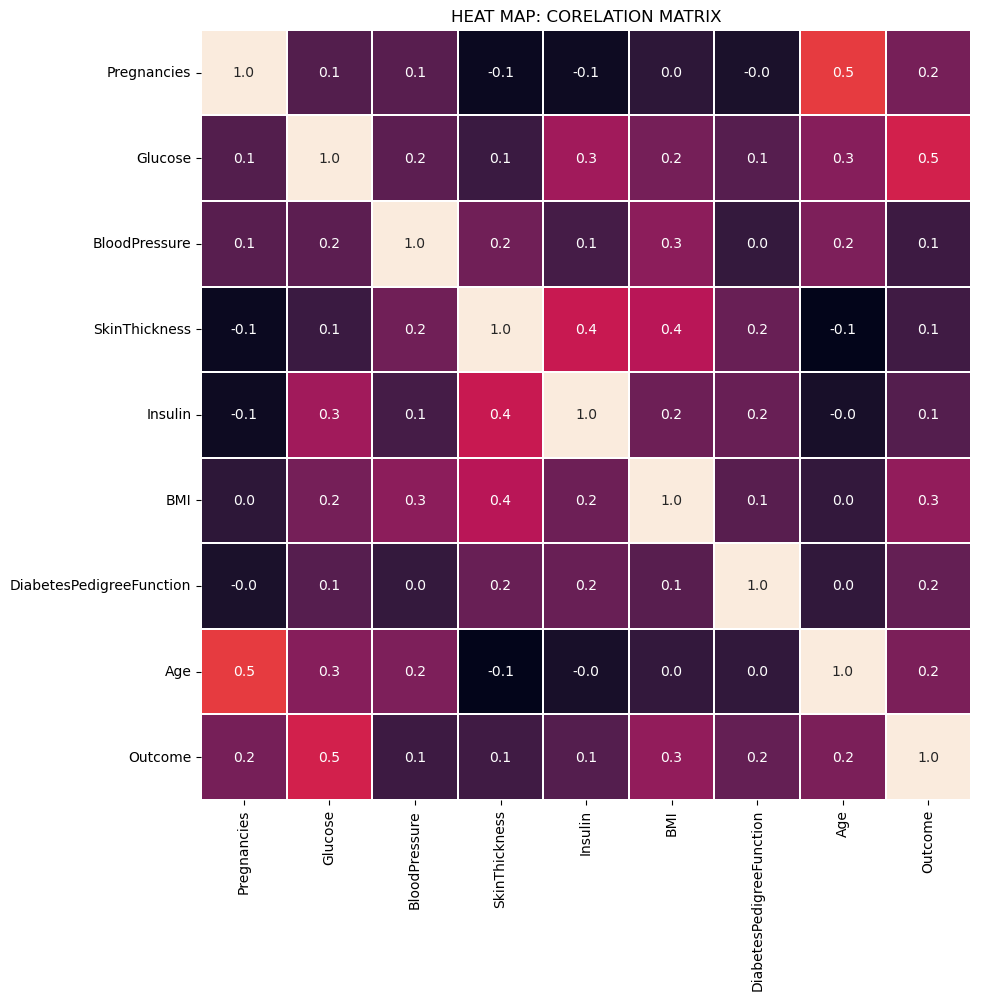

In [267]:
plt.figure(figsize=(10,10))
plt.title("HEAT MAP: CORELATION MATRIX")
sns.heatmap(df.corr(),annot=True,square=True,fmt="0.1f",cbar=False,linewidth=0.3)
plt.show()

* Pragnancies,Glucose,BMI,Age,DiabeticsPredigreefunction are the high corelated symptoms for the prediction of the  Daibetics.
* Mulicolinearity(0.4) : Skin thickness with Insulin and BMI
* Multicolinearity(0.5) : age and Pragnancies

#### OUTLIER ANALYSIS 

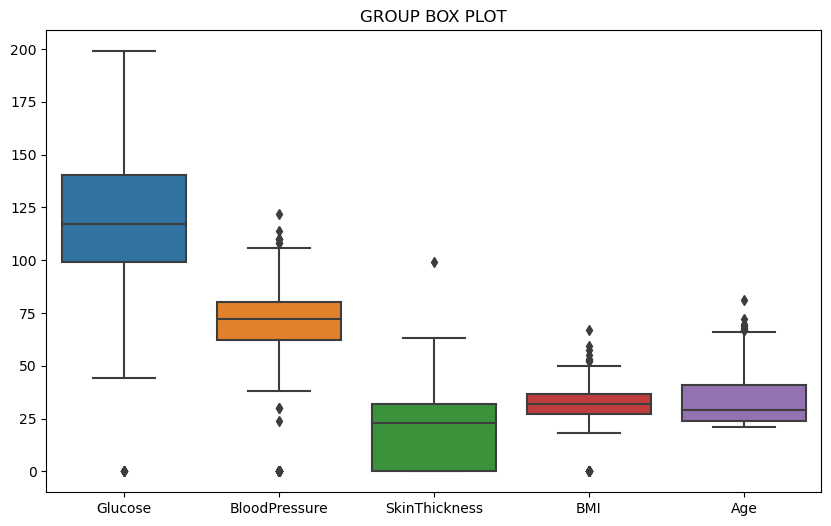

In [268]:
# Box plot of features with almost same range
average_scaled_features = []
for feature in continous_features:
    if feature not in ["DiabetesPedigreeFunction","Insulin"]:
        average_scaled_features.append(feature)
plt.figure(figsize=(10,6))
plt.title("GROUP BOX PLOT")
sns.boxplot(data=df[average_scaled_features],linewidth=1.5)
plt.show()

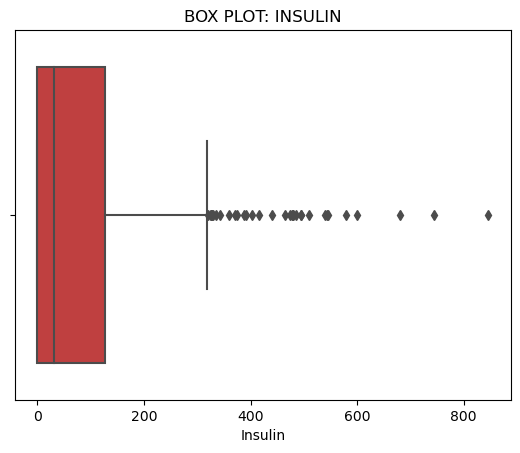

In [269]:
# Box plot of insulin
plt.title("BOX PLOT: INSULIN")
sns.boxplot(x="Insulin",data = df,color="r",saturation=0.5)
plt.show()

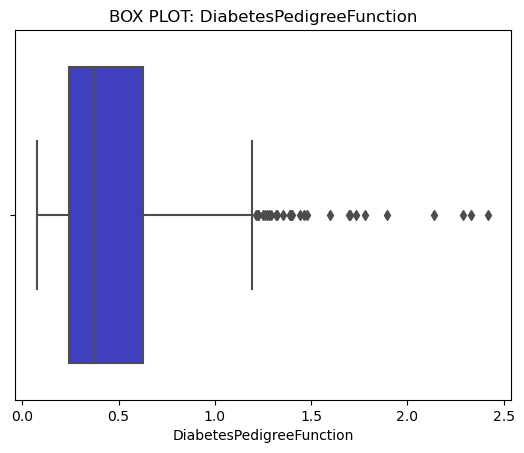

In [270]:
# Box plot of DiabetesPedigreeFunction
plt.title("BOX PLOT: DiabetesPedigreeFunction")
sns.boxplot(x="DiabetesPedigreeFunction",data = df,color="b",saturation=0.5)
plt.show()

* Features Insulin,Diabetics pedigree function have comparitively more outliers 

### FEATURE ENGINEERING
1. DATA TRANSFORMATION
2. DATA REDUCTION

#### DATA TRANSFORMATION

In [271]:
scaler = MinMaxScaler(feature_range=(0,1))

for feature in df.columns:
    if feature != "Outcome":
        df[feature] = scaler.fit_transform(df[[feature]])

In [272]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.0,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.0,0.396423,0.116567,0.166667,0


* All the continous features are transformed into the scale of 0 to 1

#### DATA REDUCTION

In [273]:
# Removing multicolinear features
multicolinear_features = ["Age","SkinThickness","BloodPressure","Insulin"]

df.drop(columns=multicolinear_features,inplace=True)

### SPLITTING THE DATASET INTO TRAIN AND TEST

In [274]:
# Splitting the dataset in X and y
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

In [275]:
test_size = 0.2
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size,shuffle=True,random_state = 42)

In [276]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((614, 4), (154, 4), (614,), (154,))

* So, the splitting is Sucesssful

### SPOT CHECKING USING
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest classifier
4. SVC
5. KNeighnors Classifier

In [277]:
model_name = ["Logistic-Reg","DTC","RFC","SVC","KNN"]
results = []

# Training using Logistic Regression
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
results.append(accuracy)

# Training using DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
results.append(accuracy)

# Training using RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
results.append(accuracy)

# Training using SVC
model = SVC()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
results.append(accuracy)

# Training using KNN
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
results.append(accuracy)

In [278]:
results 

[0.8181818181818182,
 0.7142857142857143,
 0.7597402597402597,
 0.7857142857142857,
 0.7467532467532467]

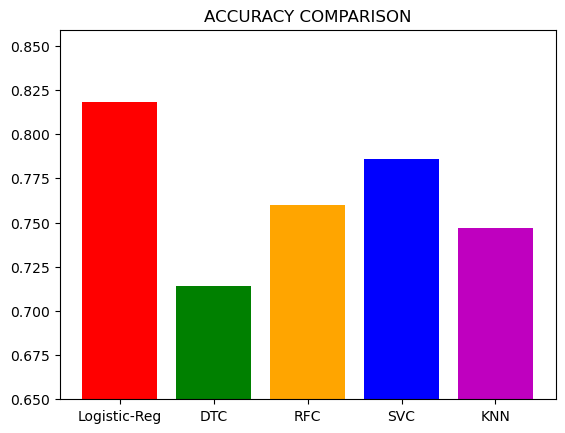

In [279]:
plt.title("ACCURACY COMPARISON")
plt.bar(model_name,results,color=["r","g","orange","b","m"])
plt.ylim(0.65)
plt.show()

* So, the Logistc regression works so well, we can take this for further training 

### TRAINING MODEL

In [280]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

### TESTING MODEL

Accuracy Score:  0.8181818181818182
Classification Report:                precision    recall  f1-score   support

           0       0.94      0.81      0.87       115
           1       0.60      0.85      0.70        39

    accuracy                           0.82       154
   macro avg       0.77      0.83      0.79       154
weighted avg       0.85      0.82      0.83       154



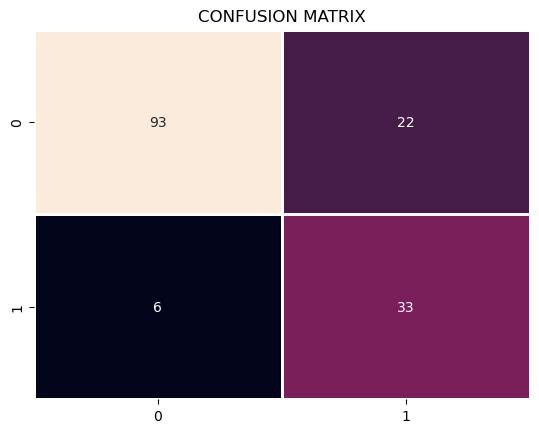

In [281]:
print("Accuracy Score: ",accuracy_score(y_predict,y_test))
print("Classification Report: ",classification_report(y_predict,y_test))
# Confusion Matrix
plt.title("CONFUSION MATRIX")
sns.heatmap(confusion_matrix(y_predict,y_test),annot=True,cbar=False,linewidth=0.8,linecolor="w")
plt.show()

* Steps we can do to imporve the accuracy 
1. Undersambling : Since the dataset is not balanced 
2. Dataset has many noises(eg:0 value for insulin which is biologically wrong)

### PREDICTION SYSTEM

In [287]:
def scaling_minmax(values):
    features_to_scale = [feature for feature in df.columns if feature != "Outcome"]
    sacled_values = []
    
    for i in range(len(values)):
        scaled_value = (values[i] - data[features_to_scale[i]].describe()["min"])/(data[features_to_scale[i]].describe()["max"] - data[features_to_scale[i]].describe()["min"])
        sacled_values.append(scaled_value)
    return sacled_values

In [300]:
values = [8,183,23.3,0.672]
scaled_values = scaling_minmax(values)
scaled_values = np.asarray(scaled_values).reshape(1,-1)
predicted_value = model.predict(scaled_values)

if predicted_value == 0:
    print("DIABETICS IS NOT DETECTED")
else:
    print("DIABETICS IS DETECTED")

DIABETICS IS DETECTED
